In [1]:
import os
os.getcwd()

'/root/mmdetection/demo'

In [4]:
import mmcv

In [1]:
!pip install openmim


Looking in indexes: http://mirrors.aliyun.com/pypi/simple


In [2]:
import mmdet

In [3]:
mmdet.__version__

'2.25.1'

In [6]:
!mim search mmdet --model "mask r-cnn"


--------------------------------------------------------------------------------
config id: mask_rcnn_convnext-t_p4_w7_fpn_fp16_ms-crop_3x_coco
architecture                                            convnext
coco/box_ap                                             46.2
coco/mask_ap                                            41.7
config                                                  configs/convnext/mask...
epochs                                                  36
model                                                   mask r-cnn
paper                                                   URL,Title
readme                                                  configs/mask_rcnn/REA...
training_data                                           coco
training_memory(GB)                                     7.3
training_resources                                      8x a100 gpus
training_techniques                                     adamw,mixed precision...
weight                                      

In [8]:
!mim download mmdet --config  mask_rcnn_r50_fpn_1x_coco --dest .


processing mask_rcnn_r50_fpn_1x_coco...
downloading ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 MiB 19.0 MB/s eta 0:00:0000:0100:01
Successfully downloaded mask_rcnn_r50_fpn_1x_coco_20200205-d4b0c5d6.pth to /root/mmdetection/demo
Successfully dumped mask_rcnn_r50_fpn_1x_coco.py to /root/mmdetection/demo


In [10]:
from mmdet.apis import init_detector,inference_detector,show_result_pyplot

In [15]:
config_file = "mask_rcnn_r50_fpn_1x_coco.py"
checkpoint_file = "mask_rcnn_r50_fpn_1x_coco_20200205-d4b0c5d6.pth"

In [12]:
help(init_detector)

Help on function init_detector in module mmdet.apis.inference:

init_detector(config, checkpoint=None, device='cuda:0', cfg_options=None)
    Initialize a detector from config file.
    
    Args:
        config (str, :obj:`Path`, or :obj:`mmcv.Config`): Config file path,
            :obj:`Path`, or the config object.
        checkpoint (str, optional): Checkpoint path. If left as None, the model
            will not load any weights.
        cfg_options (dict): Options to override some settings in the used
            config.
    
    Returns:
        nn.Module: The constructed detector.



In [16]:
model = init_detector(config_file,checkpoint_file)

load checkpoint from local path: mask_rcnn_r50_fpn_1x_coco_20200205-d4b0c5d6.pth


load checkpoint from local path: mask_rcnn_r50_fpn_1x_coco_20200205-d4b0c5d6.pth


/root/mmdetection/mmdet/datasets/utils.py:66: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(


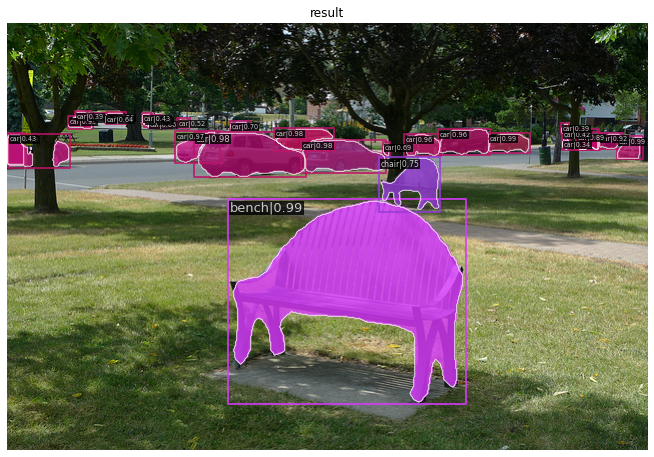

In [1]:
from mmdet.apis import init_detector,inference_detector,show_result_pyplot
config_file = "mask_rcnn_r50_fpn_1x_coco.py"
checkpoint_file = "mask_rcnn_r50_fpn_1x_coco_20200205-d4b0c5d6.pth"
model = init_detector(config_file,checkpoint_file)
result=inference_detector(model,"demo.jpg")
show_result_pyplot(model,"demo.jpg",result)

In [19]:
!mim search mmdet --model "yolov3"

--------------------------------------------------------------------------------
config id: yolov3_d53_320_273e_coco
architecture                                            darknet
coco/box_ap                                             27.9
config                                                  configs/yolo/yolov3_d...
epochs                                                  273
inference_time(ms/im)[V100,PyTorch,1,FP32,(320, 320)]   15.65
model                                                   yolov3
paper                                                   URL,Title
readme                                                  configs/yolo/README.md
training_data                                           coco
training_memory(GB)                                     2.7
training_resources                                      8x v100 gpus
training_techniques                                     sgd with momentum,wei...
weight                                                  https://download.ope

In [20]:
!mim download mmdet --config  yolov3_mobilenetv2_320_300e_coco --dest .

processing yolov3_mobilenetv2_320_300e_coco...
downloading ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MiB 14.5 MB/s eta 0:00:0000:0100:01
Successfully downloaded yolov3_mobilenetv2_320_300e_coco_20210719_215349-d18dff72.pth to /root/mmdetection/demo
Successfully dumped yolov3_mobilenetv2_320_300e_coco.py to /root/mmdetection/demo


In [24]:
ls /mmdetection/dataset/COCO2017/annotations/instances_train2017.json

ls: cannot access '/mmdetection/dataset/COCO2017/annotations/instances_train2017.json': No such file or directory


In [26]:
ls ../dataset/COCO2017/annotations/instances_train2017.json

../dataset/COCO2017/annotations/instances_train2017.json


In [28]:
from mmcv import Config
config = Config.fromfile('yolov3_NEU.py')
print(config.pretty_text)

checkpoint_config = dict(interval=1)
log_config = dict(interval=50, hooks=[dict(type='TextLoggerHook')])
custom_hooks = [dict(type='NumClassCheckHook')]
dist_params = dict(backend='nccl')
log_level = 'INFO'
load_from = None
resume_from = None
workflow = [('train', 1)]
opencv_num_threads = 0
mp_start_method = 'fork'
auto_scale_lr = dict(enable=False, base_batch_size=192)
model = dict(
    type='YOLOV3',
    backbone=dict(
        type='MobileNetV2',
        out_indices=(2, 4, 6),
        act_cfg=dict(type='LeakyReLU', negative_slope=0.1),
        init_cfg=dict(
            type='Pretrained', checkpoint='open-mmlab://mmdet/mobilenet_v2')),
    neck=dict(
        type='YOLOV3Neck',
        num_scales=3,
        in_channels=[320, 96, 32],
        out_channels=[96, 96, 96]),
    bbox_head=dict(
        type='YOLOV3Head',
        num_classes=80,
        in_channels=[96, 96, 96],
        out_channels=[96, 96, 96],
        anchor_generator=dict(
            type='YOLOAnchorGenerator',
        

In [12]:
#!mim train mmdet yolov3_NEU.py
!python tools/train.py demo/yolov3_NEU.py --no-validate --gpu-id 0
#!bash tools/dist_train.sh demo/yolov3_NEU.py 3 #分布式多GPU运算


2023-02-16 09:29:44,437 - mmdet - INFO - Environment info:
------------------------------------------------------------
sys.platform: linux
Python: 3.8.10 (default, Jun  4 2021, 15:09:15) [GCC 7.5.0]
CUDA available: True
GPU 0: NVIDIA TITAN X (Pascal)
CUDA_HOME: /usr/local/cuda
NVCC: Cuda compilation tools, release 11.3, V11.3.109
GCC: gcc (Ubuntu 9.3.0-17ubuntu1~20.04) 9.3.0
PyTorch: 1.10.0+cu113
PyTorch compiling details: PyTorch built with:
  - GCC 7.3
  - C++ Version: 201402
  - Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191122 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.2.3 (Git Hash 7336ca9f055cf1bfa13efb658fe15dc9b41f0740)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.3
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=sm_60;-gencode;arch=compute_7

In [7]:
!mim train mmdet yolov3_NEU.py

Training command is python /root/mmdetection/mmdet/.mim/tools/train.py yolov3_NEU.py --gpus 1 --launcher none. 
/root/mmdetection/mmdet/.mim/tools/train.py:155: UserWarning: `--gpus` is deprecated because we only support single GPU mode in non-distributed training. Use `gpus=1` now.
  warnings.warn('`--gpus` is deprecated because we only support '
2023-02-16 13:00:39,978 - mmdet - INFO - Environment info:
------------------------------------------------------------
sys.platform: linux
Python: 3.8.10 (default, Jun  4 2021, 15:09:15) [GCC 7.5.0]
CUDA available: True
GPU 0: NVIDIA TITAN X (Pascal)
CUDA_HOME: /usr/local/cuda
NVCC: Cuda compilation tools, release 11.3, V11.3.109
GCC: gcc (Ubuntu 9.3.0-17ubuntu1~20.04) 9.3.0
PyTorch: 1.10.0+cu113
PyTorch compiling details: PyTorch built with:
  - GCC 7.3
  - C++ Version: 201402
  - Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191122 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.2.3 (Git Hash 7336ca9f055cf

load checkpoint from local path: ./work_dirs/yolov3_NEU/latest.pth


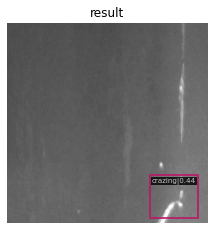

In [12]:
from mmdet.apis import init_detector,inference_detector,show_result_pyplot
config_file = "yolov3_NEU.py"
checkpoint_file = "./work_dirs/yolov3_NEU/latest.pth"
model = init_detector(config_file,checkpoint_file)
result=inference_detector(model,"../data/COCO2017/val2017/scratches_3.jpg")
show_result_pyplot(model,"../data/COCO2017/val2017/scratches_3.jpg",result)#inclusion_1

In [2]:
cd mmdetection

/root/mmdetection


In [6]:
#第一个语句就是测试模型及权重文件在自定义的数据集上,以coco指标作为测试标准，out保存参数为.pkl，第二行就是从pkl中输出结果，
!python tools/test.py demo/yolov3_NEU.py demo/work_dirs/yolov3_NEU/latest.pth --out=demo/work_dirs/result.pkl --eval bbox
#!python tools/analysis_tools/eval_metric.py demo/yolov3_NEU.py demo/work_dirs/result.pkl --eval bbox


loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
load checkpoint from local path: demo/work_dirs/yolov3_NEU/latest.pth
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 309/309, 23.5 task/s, elapsed: 13s, ETA:     0s
writing results to demo/work_dirs/result.pkl
Traceback (most recent call last):
  File "tools/test.py", line 275, in <module>
    main()
  File "tools/test.py", line 267, in main
    metric = dataset.evaluate(outputs, **eval_kwargs)
  File "/root/mmdetection/mmdet/datasets/coco.py", line 636, in evaluate
    raise KeyError(f'metric {metric} is not supported')
KeyError: 'metric mAP is not supported'


In [7]:
#计算网络参数量（很多数据不太清楚用来干什么）
!python tools/analysis_tools/get_flops.py demo/yolov3_NEU.py
#计算损失曲线
!python tools/analysis_tools/analyze_logs.py plot_curve work_dirs/20211018_114826.log.json --keys loss_cls loss_bbox --out work_dirs/losses.pdf

YOLOV3(
  3.673 M, 100.000% Params, 16.457 GFLOPs, 100.000% FLOPs, 
  (backbone): MobileNetV2(
    2.224 M, 60.545% Params, 6.509 GFLOPs, 39.554% FLOPs, 
    (conv1): ConvModule(
      0.001 M, 0.025% Params, 0.246 GFLOPs, 1.493% FLOPs, 
      (conv): Conv2d(0.001 M, 0.024% Params, 0.221 GFLOPs, 1.344% FLOPs, 3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(0.0 M, 0.002% Params, 0.016 GFLOPs, 0.100% FLOPs, 32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (activate): LeakyReLU(0.0 M, 0.000% Params, 0.008 GFLOPs, 0.050% FLOPs, negative_slope=0.1, inplace=True)
    )
    (layer1): Sequential(
      0.001 M, 0.024% Params, 0.238 GFLOPs, 1.444% FLOPs, 
      (0): InvertedResidual(
        0.001 M, 0.024% Params, 0.238 GFLOPs, 1.444% FLOPs, 
        (drop_path): Identity(0.0 M, 0.000% Params, 0.0 GFLOPs, 0.000% FLOPs, )
        (depthwise_conv): ConvModule(
          0.0 M, 0.010% Params, 0.098 GFLOPs, 0.597% FLOPs, 
     

In [11]:
#绘制PR曲线,其中plot_pr_curve.py是在这个链接里面http://t.csdn.cn/K5ygJ
!python tools/analysis_tools/plot_pr_curve.py demo/yolov3_NEU.py demo/work_dirs/result.pkl --out demo/work_dirs/pr_curve.jpg


loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
Loading and preparing results...
DONE (t=7.71s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=10.98s).
Accumulating evaluation results...
DONE (t=0.92s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.044
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.137
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.020
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.052
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.043
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.045
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.033
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | max

In [1]:
import os
os.getcwd()

'/root/mmdetection/demo'

In [10]:
cd ./mmdetection/demo

/root/mmdetection/demo


In [4]:
#!pip install onnx==1.8.0
#!pip install onnx-simplifier
#!pip install onnxruntime
#!pip uninstall numpy我转化了numpy的版本从1.24.2到1.19.2--simplify
!python ./tools/deployment/pytorch2onnx.py configs/mask_rcnn/mask_rcnn_r50_fpn_1x_coco.py demo/mask_rcnn_r50_fpn_1x_coco_20200205-d4b0c5d6.pth --output-file demo/mask_rcnn.onnx --input-img demo/demo.jpg --test-img tests/data/color.jpg --shape 512 512 --show --verify --simplify 

./tools/deployment/pytorch2onnx.py:297: UserWarning: Arguments like `--mean`, `--std`, `--dataset` would be         parsed directly from config file and are deprecated and         will be removed in future releases.
  warnings.warn('Arguments like `--mean`, `--std`, `--dataset` would be \
/root/miniconda3/lib/python3.8/site-packages/mmcv/onnx/symbolic.py:481: UserWarning: DeprecationWarning: This function will be deprecated in future. Welcome to use the unified model deployment toolbox MMDeploy: https://github.com/open-mmlab/mmdeploy
  warnings.warn(msg)
load checkpoint from local path: demo/mask_rcnn_r50_fpn_1x_coco_20200205-d4b0c5d6.pth
/root/mmdetection/mmdet/models/dense_heads/base_dense_head.py:415: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace 

In [12]:
!nvidia-smi

Sun Feb 26 22:34:24 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.60.11    Driver Version: 525.60.11    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA TITAN X ...  On   | 00000000:02:00.0 Off |                  N/A |
| 99%   23C    P8    12W / 250W |   1783MiB / 12288MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [17]:
!pip list

Package                        Version             Location
------------------------------ ------------------- -----------------
absl-py                        1.0.0
addict                         2.4.0
anyio                          3.4.0
argon2-cffi                    21.1.0
attrs                          21.2.0
Babel                          2.9.1
backcall                       0.2.0
bleach                         4.1.0
brotlipy                       0.7.0
cachetools                     4.2.4
certifi                        2021.5.30
cffi                           1.14.6
chardet                        4.0.0
click                          8.1.3
colorama                       0.4.5
coloredlogs                    15.0.1
commonmark                     0.9.1
conda                          4.10.3
conda-package-handling         1.7.3
cryptography                   3.4.7
cycler                         0.11.0
debugpy                        1.5.1
decorator                      5.1.0
defusedxml

In [ ]:
!pip uninstall numpy

In [12]:
!mim train mmdet mask_hk.py

Training command is python /root/mmdetection/mmdet/.mim/tools/train.py mask_hk.py --gpus 1 --launcher none. 
/root/mmdetection/mmdet/.mim/tools/train.py:155: UserWarning: `--gpus` is deprecated because we only support single GPU mode in non-distributed training. Use `gpus=1` now.
  warnings.warn('`--gpus` is deprecated because we only support '
2023-03-12 23:29:07,765 - mmdet - INFO - Environment info:
------------------------------------------------------------
sys.platform: linux
Python: 3.8.10 (default, Jun  4 2021, 15:09:15) [GCC 7.5.0]
CUDA available: True
GPU 0: NVIDIA TITAN X (Pascal)
CUDA_HOME: /usr/local/cuda
NVCC: Cuda compilation tools, release 11.3, V11.3.109
GCC: gcc (Ubuntu 9.3.0-17ubuntu1~20.04) 9.3.0
PyTorch: 1.10.0+cu113
PyTorch compiling details: PyTorch built with:
  - GCC 7.3
  - C++ Version: 201402
  - Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191122 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.2.3 (Git Hash 7336ca9f055cf1bf

load checkpoint from local path: ./work_dirs/mask_hk/latest.pth


/root/mmdetection/mmdet/datasets/utils.py:66: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(


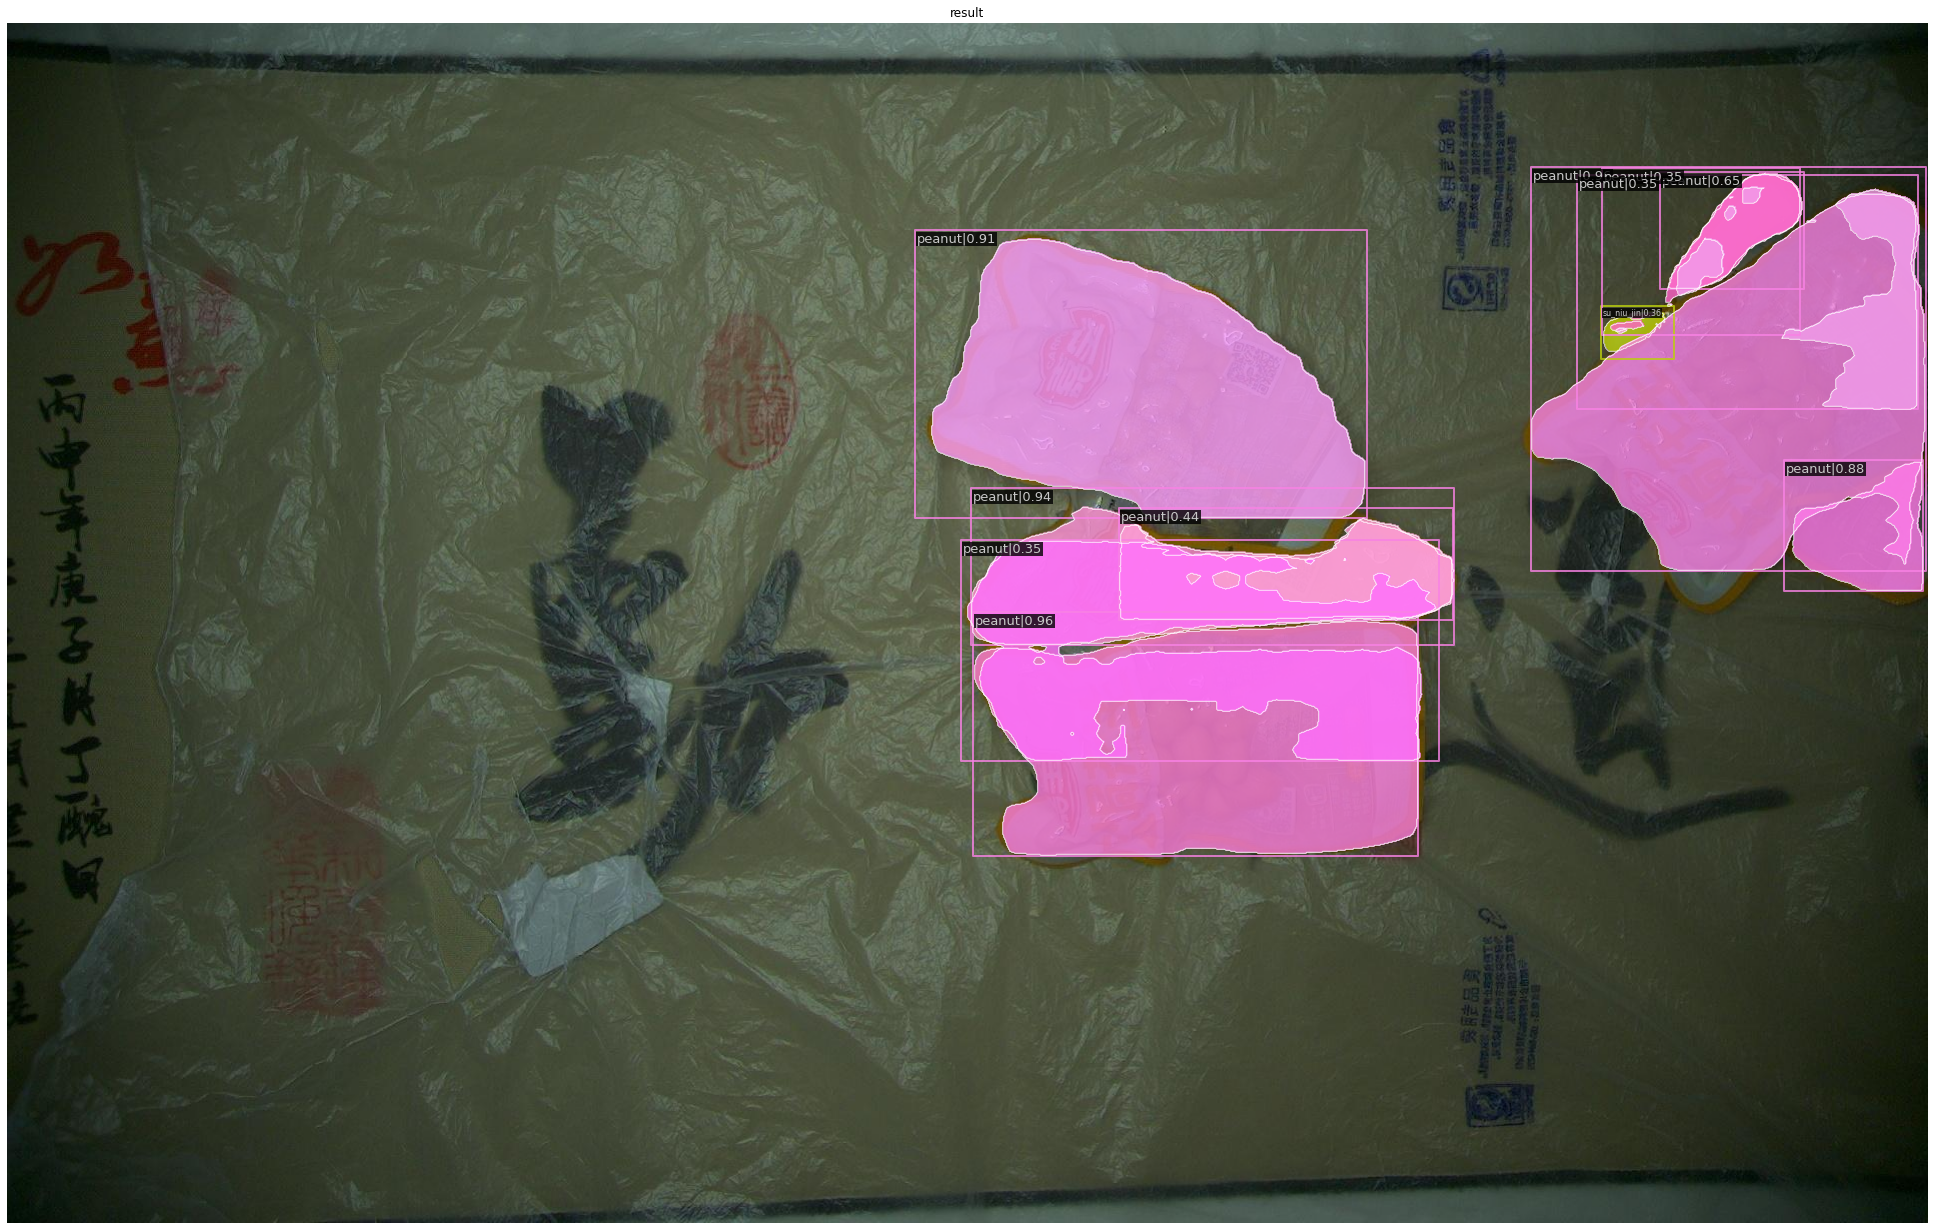

In [2]:
from mmdet.apis import init_detector,inference_detector,show_result_pyplot
config_file = "mask_hk.py"
checkpoint_file = "./work_dirs/mask_hk/latest.pth"
model = init_detector(config_file,checkpoint_file)
result=inference_detector(model,"../data/coco1/val2017/JPEGImages/Image_20221124134315319.jpg")
show_result_pyplot(model,"../data/coco1/val2017/JPEGImages/Image_20221124134315319.jpg",result)

In [1]:
!mim train mmdet solo_hk.py

Training command is python /root/mmdetection/mmdet/.mim/tools/train.py solo_hk.py --gpus 1 --launcher none. 
/root/mmdetection/mmdet/.mim/tools/train.py:155: UserWarning: `--gpus` is deprecated because we only support single GPU mode in non-distributed training. Use `gpus=1` now.
  warnings.warn('`--gpus` is deprecated because we only support '
2023-03-13 18:41:44,688 - mmdet - INFO - Environment info:
------------------------------------------------------------
sys.platform: linux
Python: 3.8.10 (default, Jun  4 2021, 15:09:15) [GCC 7.5.0]
CUDA available: True
GPU 0: NVIDIA TITAN X (Pascal)
CUDA_HOME: /usr/local/cuda
NVCC: Cuda compilation tools, release 11.3, V11.3.109
GCC: gcc (Ubuntu 9.3.0-17ubuntu1~20.04) 9.3.0
PyTorch: 1.10.0+cu113
PyTorch compiling details: PyTorch built with:
  - GCC 7.3
  - C++ Version: 201402
  - Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191122 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.2.3 (Git Hash 7336ca9f055cf1bf

In [ ]:
#跨实例拷贝
scp -rP 28455 /root/autodl-tmp/ root@region-11.autodl.com:/root/autodl-tmp/
kQW/I7XVBi